<a href="https://colab.research.google.com/github/AtharvaGhodki/Stock-Market-Price-Prediction/blob/main/stock_markert_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df=pd.read_csv('STOCK_VAL.csv')
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
0,09-02-2023,4626.90,4658.00,4585.00,4637.60,1722,607,7.958223e+06
1,08-02-2023,4597.05,4637.05,4578.00,4590.95,3670,906,1.690962e+07
2,07-02-2023,4630.00,4661.50,4595.95,4605.35,5979,1589,2.767515e+07
3,06-02-2023,4602.00,4634.10,4602.00,4626.60,4502,1230,2.079046e+07
4,03-02-2023,4590.00,4656.45,4571.50,4624.80,26221,4118,1.209830e+08


In [ ]:
df1=df['CLOSE']
df1.head()

0    4637.60
1    4590.95
2    4605.35
3    4626.60
4    4624.80
Name: CLOSE, dtype: float64

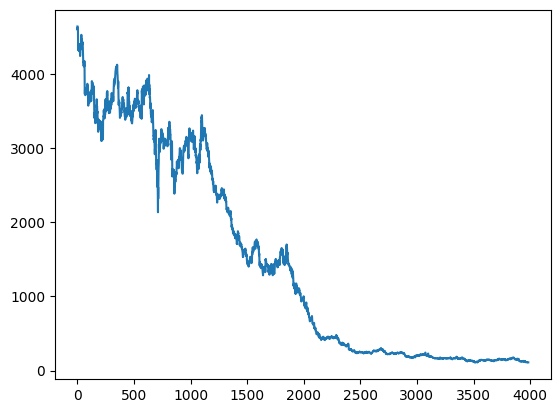

In [ ]:
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[1.00000000e+00]
 [9.89700304e-01]
 [9.92879632e-01]
 ...
 [3.95208047e-04]
 [2.58320344e-04]
 [3.04685534e-04]]


In [ ]:
training_size=int(len(df1)*0.75)
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [ ]:
train_data

array([[1.        ],
       [0.9897003 ],
       [0.99287963],
       ...,
       [0.0154087 ],
       [0.0166716 ],
       [0.0170359 ]])

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_test.shape), print(y_test.shape)

(896, 100)
(896,)


(None, None)

In [ ]:
print(X_train.shape), print(y_train.shape)

(2887, 100)
(2887,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
91/91 [==============================] - 24s 186ms/step - loss: 0.0147 - val_loss: 4.5930e-06
Epoch 2/100
91/91 [==============================] - 16s 175ms/step - loss: 5.7585e-04 - val_loss: 3.7087e-06
Epoch 3/100
91/91 [==============================] - 15s 169ms/step - loss: 5.5241e-04 - val_loss: 2.5629e-06
Epoch 4/100
91/91 [==============================] - 18s 198ms/step - loss: 5.2517e-04 - val_loss: 3.8489e-06
Epoch 5/100
91/91 [==============================] - 15s 170ms/step - loss: 4.8021e-04 - val_loss: 2.3607e-06
Epoch 6/100
91/91 [==============================] - 16s 171ms/step - loss: 4.7210e-04 - val_loss: 2.7603e-06
Epoch 7/100
91/91 [==============================] - 16s 172ms/step - loss: 4.4639e-04 - val_loss: 9.0273e-06
Epoch 8/100
91/91 [==============================] - 17s 183ms/step - loss: 4.4883e-04 - val_loss: 6.2120e-06
Epoch 9/100
91/91 [==============================] - 15s 170ms/step - loss: 4.2984e-04 - val_loss: 2.2130e-06
Epoch 10/100
9

In [ ]:
train_predict_=model.predict(X_train)
test_predict_=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict_)
test_predict=scaler.inverse_transform(test_predict_)

28/28 [==============================] - 1s 40ms/step


In [ ]:
predicted_values = np.array(test_predict_)
true_values = np.array(y_test)

# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(predicted_values - true_values))

# Calculate the accuracy
accuracy = 1 - mae

print(f"Accuracy: {accuracy}")

Accuracy: 0.995076181177411


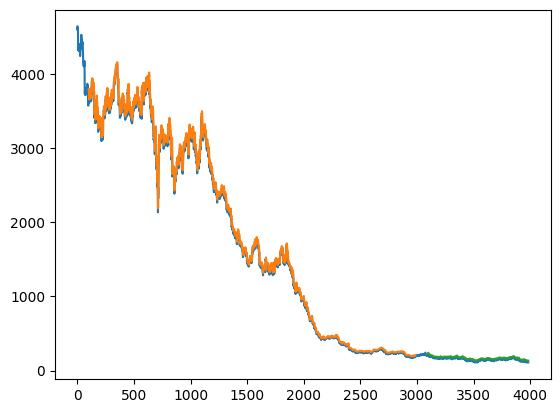

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
print(len(test_data))

997


In [ ]:
x_input=test_data[897:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[0.010571263296874103, 0.011502982827216807, 0.010489572248005192, 0.009301740240127521, 0.008871206333926514, 0.00831703192132931, 0.008158065555962778, 0.007255048286033475, 0.007495705700268914, 0.007769481107289044, 0.007738570980689998, 0.008400930836383862, 0.009167060402803105, 0.009613049372303641, 0.010871533098121989, 0.008864582735369577, 0.006544115374255394, 0.005234850726167188, 0.005210564198125076, 0.004927957326362361, 0.0039587040708636695, 0.004155204161386185, 0.004338457054794818, 0.004364951449022578, 0.003930001810450268, 0.0036672657343583687, 0.0034067375244521136, 0.003812984902611019, 0.003687136530029188, 0.0041596198937574776, 0.00430313119582448, 0.003576743220746876, 0.0032477711590855884, 0.0032411475605286476, 0.0033360858065114365, 0.0032477711590855884, 0.0033073835460980354, 0.0030203609419640273, 0.003146209314545862, 0.0029055519003104227, 0.0037070073257, 0.0030534789347487212, 0.0034089453906377618, 0.003768827578898095, 0.003537001629405241, 0.0

In [ ]:
#prediction of next month i.e 30 days
from numpy import array

lst_output=[]
i=0
while(i<31):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 100, 1))  #here the shape should be maintain
        yhat = model.predict(x_input)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,100,1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

1/1 [==============================] - 0s 37ms/step
[0.00545908]
101
1/1 [==============================] - 0s 40ms/step


In [ ]:
#Now graphical representation of future 30 day or 1 month stock price movment
day_new=np.arange(1,101)
day_pred=np.arange(101,132)

In [ ]:
print(len(df1))

3985


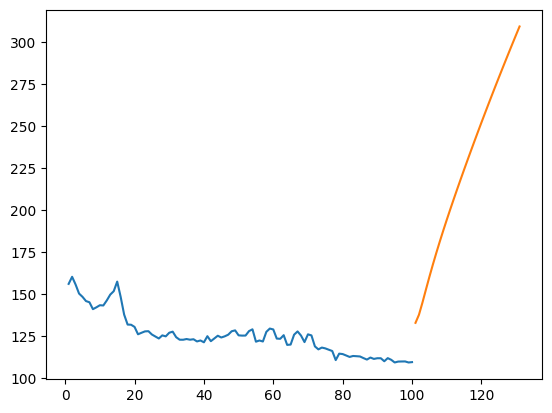

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[3885:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

[[1.0], [0.9897003042439603], [0.9928796315512909], [0.9975713471957892], [0.9971739312823729], [0.9863333083108499], [0.9407629502391119], [0.9294586753686033], [0.9494288250177734], [0.9431916030433227], [0.9469228968970648], [0.9470884868609882], [0.9339075257326803], [0.929734658641809], [0.9409175008721071], [0.9462936550341557], [0.9398466857720686], [0.9267871572839713], [0.9333114018625559], [0.9252637296158754], [0.9318100528563165], [0.9387869100029586], [0.9383122187730445], [0.9279462870314356], [0.9120275718329263], [0.923762380609636], [0.9269306685860382], [0.9372634823348626], [0.9443396934598588], [0.9413259561164518], [0.9421318272742125], [0.9320970754604505], [0.94564233450939], [0.9516808485271324], [0.9712646215938143], [0.9751394267496235], [0.9579291098325113], [0.9619695049522439], [0.949461943010558], [0.9536348101014295], [0.9543744452736208], [0.9501463815281084], [0.9460507897537346], [0.9458741604588828], [0.9530386862313048], [0.9482586559393807], [0.9530

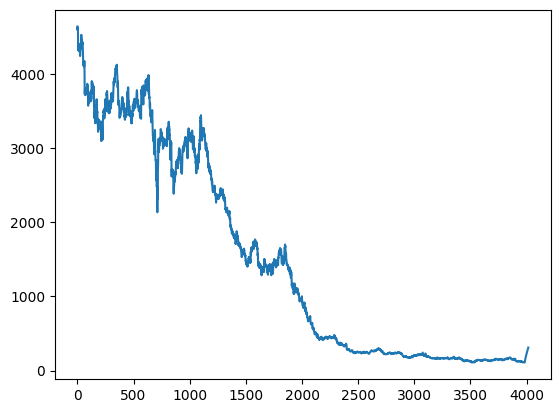

In [ ]:
df2=df1.tolist()
df2.extend(lst_output)
print(df2)
df2=scaler.inverse_transform(df2).tolist()
plt.plot(df2)